## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
PATIENCE=[5,10,25]

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_7 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_8 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_9 (Batch (None, 128)               512 

C:\Users\chris-wang\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


50000/50000 [==============================] - 7s 137us/step - loss: 1.5445 - accuracy: 0.4567 - val_loss: 1.5893 - val_accuracy: 0.4405
Epoch 3/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.4402 - accuracy: 0.4969 - val_loss: 1.5597 - val_accuracy: 0.4466
Epoch 4/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.3673 - accuracy: 0.5214 - val_loss: 1.5279 - val_accuracy: 0.4653
Epoch 5/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.3145 - accuracy: 0.5397 - val_loss: 1.5313 - val_accuracy: 0.4708
Epoch 6/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.2602 - accuracy: 0.5610 - val_loss: 1.5059 - val_accuracy: 0.4686
Epoch 7/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.2104 - accuracy: 0.5773 - val_loss: 1.4885 - val_accuracy: 0.4707
Epoch 8/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.1670 - accuracy: 0.5938 - val_loss: 1.472

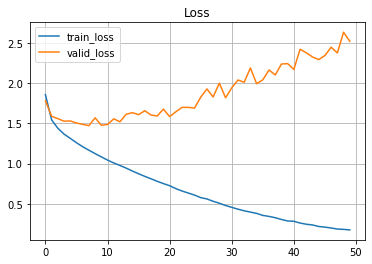

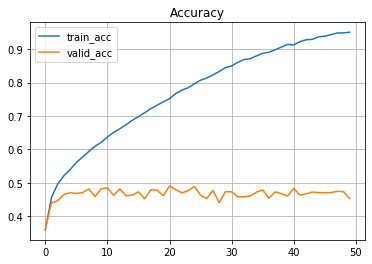

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_10 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_11 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_12 (Batc (None, 128)               512 

C:\Users\chris-wang\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


50000/50000 [==============================] - 6s 127us/step - loss: 1.5510 - accuracy: 0.4578 - val_loss: 1.6166 - val_accuracy: 0.4207
Epoch 3/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.4489 - accuracy: 0.4935 - val_loss: 1.5628 - val_accuracy: 0.4395
Epoch 4/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.3777 - accuracy: 0.5190 - val_loss: 1.5232 - val_accuracy: 0.4632
Epoch 5/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.3205 - accuracy: 0.5386 - val_loss: 1.5017 - val_accuracy: 0.4673
Epoch 6/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.2634 - accuracy: 0.5588 - val_loss: 1.4794 - val_accuracy: 0.4818
Epoch 7/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.2125 - accuracy: 0.5757 - val_loss: 1.4494 - val_accuracy: 0.4844
Epoch 8/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.1672 - accuracy: 0.5941 - val_loss: 1.481

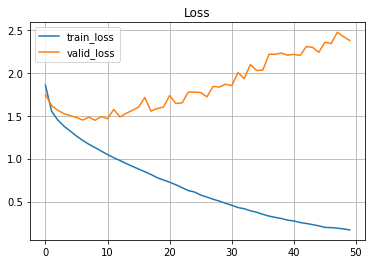

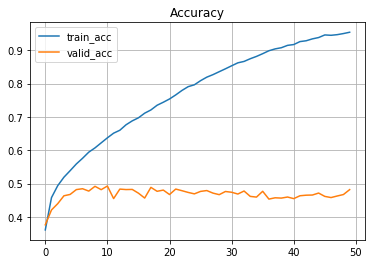

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_13 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_14 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_15 (Batc (None, 128)               512 

C:\Users\chris-wang\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


50000/50000 [==============================] - 7s 141us/step - loss: 1.5405 - accuracy: 0.4593 - val_loss: 1.6469 - val_accuracy: 0.4119
Epoch 3/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.4417 - accuracy: 0.4941 - val_loss: 1.5304 - val_accuracy: 0.4599
Epoch 4/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.3644 - accuracy: 0.5209 - val_loss: 1.5372 - val_accuracy: 0.4563
Epoch 5/50
50000/50000 [==============================] - 9s 175us/step - loss: 1.3040 - accuracy: 0.5431 - val_loss: 1.5445 - val_accuracy: 0.4606
Epoch 6/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.2553 - accuracy: 0.5625 - val_loss: 1.4922 - val_accuracy: 0.4731
Epoch 7/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.2044 - accuracy: 0.5789 - val_loss: 1.5208 - val_accuracy: 0.4676
Epoch 8/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.1599 - accuracy: 0.5965 - val_loss: 1.477

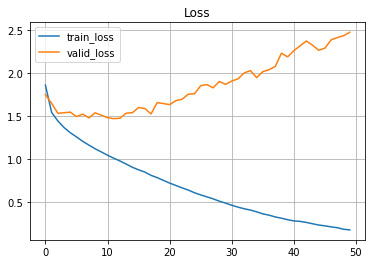

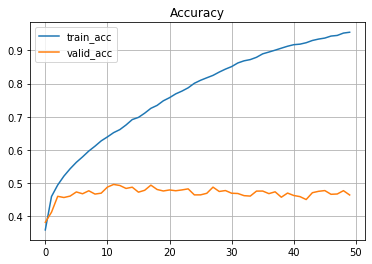

In [10]:
# 載入 Callbacks
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
%matplotlib inline

results = {}
for patience in PATIENCE:
    
    earlystop=EarlyStopping(monitor='val_acc',
                       patience=patience,
                            verbose=1)

    model=build_mlp(x_train.shape[1:])
    model.summary()
    optimizer=keras.optimizers.SGD(lr=LEARNING_RATE,nesterov=True,momentum=MOMENTUM)
    model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=optimizer)
    
    model.fit(x_train,y_train,
             epochs=EPOCHS,
             batch_size=BATCH_SIZE,
             validation_data=(x_test,y_test),
             shuffle=True,
             callbacks=[earlystop])
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    
    #
    plt.plot(range(EPOCHS),train_loss,'-',label='train_loss')
    plt.plot(range(EPOCHS),valid_loss,'-',label='valid_loss')
    plt.legend()
    plt.title('Loss')
    plt.grid()
    plt.show()
    
    plt.plot(range(EPOCHS),train_acc,'-',label='train_acc')
    plt.plot(range(EPOCHS),valid_acc,'-',label='valid_acc')
    plt.legend()
    plt.title('Accuracy')
    plt.grid()
    plt.show()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_19 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_20 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_21 (Batc (None, 128)               512 

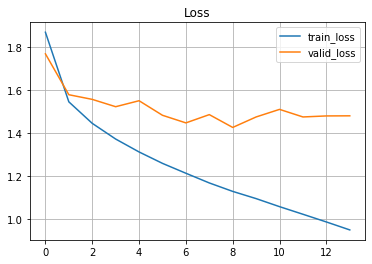

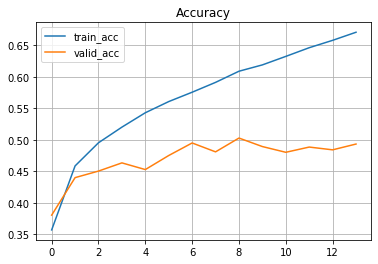

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_22 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_23 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_24 (Batc (None, 128)               512 

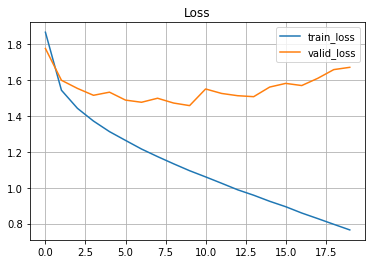

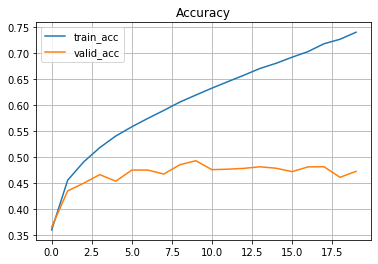

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_25 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_26 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_27 (Batc (None, 128)               512 

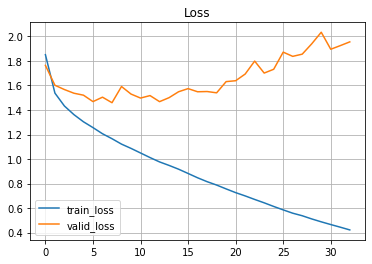

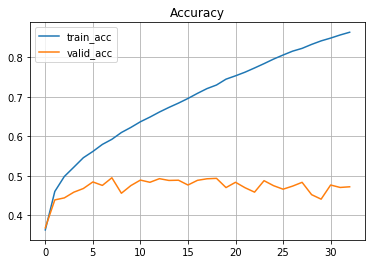

In [12]:
# 載入 Callbacks
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
%matplotlib inline
results = {}
for patience in PATIENCE:
    
    earlystop=EarlyStopping(monitor='val_loss',
                       patience=patience,
                            verbose=1)

    model=build_mlp(x_train.shape[1:])
    model.summary()
    optimizer=keras.optimizers.SGD(lr=LEARNING_RATE,nesterov=True,momentum=MOMENTUM)
    model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=optimizer)
    
    model.fit(x_train,y_train,
             epochs=EPOCHS,
             batch_size=BATCH_SIZE,
             validation_data=(x_test,y_test),
             shuffle=True,
             callbacks=[earlystop])
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    
    #
    plt.plot(range(len(train_loss)),train_loss,'-',label='train_loss')
    plt.plot(range(len(valid_loss)),valid_loss,'-',label='valid_loss')
    plt.legend()
    plt.title('Loss')
    plt.grid()
    plt.show()
    
    plt.plot(range(len(train_acc)),train_acc,'-',label='train_acc')
    plt.plot(range(len(train_acc)),valid_acc,'-',label='valid_acc')
    plt.legend()
    plt.title('Accuracy')
    plt.grid()
    plt.show()